## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.


en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 6). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**

les 3 premieres composantes servent à "agir sur le code" :
  - l'action consiste à appliquer une des trois rotations 3D sur le code généré à partir de la composante "identité" invariante. les rotations dans l'espace latent sont ici supposées coder pour des translations dans l'espace des pixels
  
Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.


Les 3 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

Le code de la couche latente est directement projeté sur la couche actionnable 3D 

**ici n = 64 **


validation du code par reconstruction de x en sortie (BCE Loss)

**on prend ici** : KL_FLAG = 0.1 (cas standard) !! KL < 0.1 tend a produire une structure d'espace moins homogene...



In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_rot import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'size': 64, 'dimension': 25, 'seed': 42, 'mean': 0.0, 'no_cuda': True, 'epochs': 10, 'momentum': 0.48, 'batch_size': 50, 'test_batch_size': 1, 'std': 1.0, 'valid_size': 0.2, 'log_interval': 10, 'lr': 0.001, 'num_processes': 1, 'verbose': 1}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = None #'2018-07-26_actionnable_code_VAE_classif_rot_latent256_KL_0_1_code64.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à 'None': Aucun fichier ou dossier de ce type
rm: impossible de supprimer 'None': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif_rot import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f7426504c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f73eb9fbac8>)

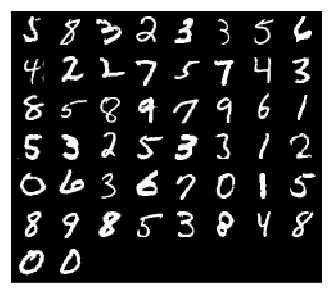

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=6, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=6, bias=False)
  (fc_classif_1): Linear(in_features=3, out_features=256, bias=True)
  (fc_classif_2): Linear(in_features=256, out_features=10, bias=True)
  (fc_z_d1): Linear(in_features=3, out_features=64, bias=True)
  (fc_z_d2): Linear(in_features=3, out_features=64, bias=True)
  (fc_z_d3): Linear(in_features=3, out_features=64, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 151.65	BCE_loss: 2844.19	KL: 0.00	Accuracy: 0.06
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 147.10	BCE_loss: 2109.79	KL: 0.00	Accuracy: 0.20
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 149.28	BCE_loss: 792.93	KL: 0.04	Accuracy: 0.18
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 149.34	BCE_loss: 519.56	KL: 0.02	Accuracy: 0.12
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 148.87	BCE_loss: 514.27	KL: 0.01	Accuracy: 0.08
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 148.08	BCE_loss: 458.16	KL: 0.03	Accuracy: 0.10
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 148.09	BCE_loss: 444.29	KL: 0.04	Accuracy: 0.10
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 148.26	BCE_loss: 421.17	KL: 0.01	Accuracy: 0.16
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 149.75	BCE_loss: 417.99	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 148.85	BCE_loss: 447.64	KL: 0.02	Accuracy: 0.06
	Train Epoch: 1 [5000/60000 (8

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 113.80	BCE_loss: 391.82	KL: 7.00	Accuracy: 0.28
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 121.34	BCE_loss: 415.28	KL: 6.10	Accuracy: 0.16
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 121.16	BCE_loss: 408.17	KL: 7.55	Accuracy: 0.18
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 132.07	BCE_loss: 386.13	KL: 6.67	Accuracy: 0.18
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 116.95	BCE_loss: 407.40	KL: 8.22	Accuracy: 0.24
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 109.99	BCE_loss: 389.94	KL: 8.66	Accuracy: 0.30
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 122.96	BCE_loss: 409.75	KL: 8.76	Accuracy: 0.26
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 114.34	BCE_loss: 378.58	KL: 7.89	Accuracy: 0.18
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 127.62	BCE_loss: 385.29	KL: 6.89	Accuracy: 0.30
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 125.00	BCE_loss: 447.23	KL: 8.54	Accuracy: 0.20
	Train Epoch: 1 [470

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 96.03	BCE_loss: 331.96	KL: 18.42	Accuracy: 0.30
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 105.09	BCE_loss: 310.68	KL: 21.32	Accuracy: 0.42
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 105.42	BCE_loss: 326.06	KL: 22.67	Accuracy: 0.30
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 102.28	BCE_loss: 319.76	KL: 19.97	Accuracy: 0.36
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 93.27	BCE_loss: 327.65	KL: 23.01	Accuracy: 0.38
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 111.74	BCE_loss: 319.93	KL: 18.78	Accuracy: 0.42
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 104.81	BCE_loss: 321.67	KL: 22.16	Accuracy: 0.26
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 102.00	BCE_loss: 304.96	KL: 23.29	Accuracy: 0.24
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 108.17	BCE_loss: 313.41	KL: 24.87	Accuracy: 0.38
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 106.26	BCE_loss: 310.36	KL: 22.23	Accuracy: 0.40
	Train Epoch

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 100.15	BCE_loss: 230.44	KL: 34.82	Accuracy: 0.34
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 88.66	BCE_loss: 220.00	KL: 36.06	Accuracy: 0.46
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 98.09	BCE_loss: 236.61	KL: 34.84	Accuracy: 0.36
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 83.50	BCE_loss: 226.81	KL: 33.44	Accuracy: 0.40
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 84.72	BCE_loss: 254.44	KL: 35.56	Accuracy: 0.32
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 92.65	BCE_loss: 235.58	KL: 34.29	Accuracy: 0.40
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 88.91	BCE_loss: 224.75	KL: 34.27	Accuracy: 0.48
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 95.94	BCE_loss: 222.64	KL: 35.75	Accuracy: 0.36
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 96.69	BCE_loss: 235.18	KL: 34.96	Accuracy: 0.38
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 90.80	BCE_loss: 236.86	KL: 36.09	Accuracy: 0.44
	Train Epoch: 3 [11000/6000

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 79.93	BCE_loss: 240.57	KL: 36.39	Accuracy: 0.38
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 89.14	BCE_loss: 236.24	KL: 36.36	Accuracy: 0.40
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 83.47	BCE_loss: 231.26	KL: 35.14	Accuracy: 0.52
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 94.01	BCE_loss: 212.28	KL: 34.47	Accuracy: 0.42
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 88.81	BCE_loss: 217.77	KL: 36.51	Accuracy: 0.42
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 85.33	BCE_loss: 224.11	KL: 36.02	Accuracy: 0.46
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 98.25	BCE_loss: 221.71	KL: 36.99	Accuracy: 0.36
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 86.47	BCE_loss: 225.41	KL: 35.50	Accuracy: 0.52
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 94.97	BCE_loss: 232.87	KL: 35.85	Accuracy: 0.40
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 88.97	BCE_loss: 234.54	KL: 38.43	Accuracy: 0.52
	Train Epoch: 3 [530

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 81.03	BCE_loss: 230.22	KL: 36.65	Accuracy: 0.46
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 76.53	BCE_loss: 215.39	KL: 35.70	Accuracy: 0.48
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 84.67	BCE_loss: 218.08	KL: 37.23	Accuracy: 0.40
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 71.01	BCE_loss: 223.23	KL: 36.85	Accuracy: 0.52
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 98.25	BCE_loss: 218.87	KL: 34.20	Accuracy: 0.38
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 89.32	BCE_loss: 229.68	KL: 36.95	Accuracy: 0.50
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 85.64	BCE_loss: 225.88	KL: 36.86	Accuracy: 0.46
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 70.46	BCE_loss: 220.84	KL: 38.39	Accuracy: 0.46
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 78.90	BCE_loss: 210.10	KL: 37.52	Accuracy: 0.42
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 93.52	BCE_loss: 221.98	KL: 36.10	Accuracy: 0.42
	Train Epoch: 4 [350

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 81.04	BCE_loss: 221.97	KL: 37.62	Accuracy: 0.52
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 70.84	BCE_loss: 229.36	KL: 37.67	Accuracy: 0.50
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 84.43	BCE_loss: 229.83	KL: 37.78	Accuracy: 0.50
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 87.22	BCE_loss: 222.41	KL: 37.33	Accuracy: 0.44
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 77.36	BCE_loss: 228.78	KL: 37.52	Accuracy: 0.46
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 79.59	BCE_loss: 221.17	KL: 37.36	Accuracy: 0.60
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 79.45	BCE_loss: 217.10	KL: 36.22	Accuracy: 0.40
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 82.88	BCE_loss: 218.80	KL: 37.13	Accuracy: 0.40
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 73.20	BCE_loss: 213.58	KL: 36.11	Accuracy: 0.58
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 77.93	BCE_loss: 215.27	KL: 37.65	Accuracy: 0.54
	Train Epoch: 5 [170

	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 66.00	BCE_loss: 217.15	KL: 38.63	Accuracy: 0.58
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 81.79	BCE_loss: 212.82	KL: 38.47	Accuracy: 0.40
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 72.59	BCE_loss: 215.66	KL: 36.86	Accuracy: 0.50
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 76.73	BCE_loss: 222.35	KL: 37.64	Accuracy: 0.54
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 82.36	BCE_loss: 213.96	KL: 36.30	Accuracy: 0.46
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 76.62	BCE_loss: 219.12	KL: 38.33	Accuracy: 0.56
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 69.41	BCE_loss: 223.76	KL: 38.25	Accuracy: 0.52
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 81.87	BCE_loss: 221.68	KL: 36.94	Accuracy: 0.52
	Train Epoch: 5 [58000/60000 (97%)]	classif Loss: 78.20	BCE_loss: 213.66	KL: 38.81	Accuracy: 0.54
	Train Epoch: 5 [58500/60000 (98%)]	classif Loss: 75.34	BCE_loss: 196.88	KL: 38.35	Accuracy: 0.56
	Train Epoch: 5 [590

	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 92.26	BCE_loss: 210.31	KL: 36.95	Accuracy: 0.44
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 77.12	BCE_loss: 209.10	KL: 38.21	Accuracy: 0.46
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 95.04	BCE_loss: 221.67	KL: 38.69	Accuracy: 0.54
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 77.89	BCE_loss: 212.41	KL: 37.25	Accuracy: 0.52
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 70.33	BCE_loss: 210.91	KL: 39.38	Accuracy: 0.52
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 78.91	BCE_loss: 210.48	KL: 37.66	Accuracy: 0.62
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 62.48	BCE_loss: 218.80	KL: 38.85	Accuracy: 0.52
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 74.20	BCE_loss: 216.17	KL: 38.08	Accuracy: 0.48
	Train Epoch: 6 [40000/60000 (67%)]	classif Loss: 85.91	BCE_loss: 212.61	KL: 38.68	Accuracy: 0.50
	Train Epoch: 6 [40500/60000 (68%)]	classif Loss: 78.86	BCE_loss: 214.07	KL: 37.70	Accuracy: 0.48
	Train Epoch: 6 [410

	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 80.56	BCE_loss: 217.05	KL: 38.78	Accuracy: 0.52
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 70.51	BCE_loss: 215.34	KL: 39.72	Accuracy: 0.56
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 80.34	BCE_loss: 226.06	KL: 39.38	Accuracy: 0.46
	Train Epoch: 7 [19500/60000 (32%)]	classif Loss: 70.67	BCE_loss: 208.64	KL: 39.38	Accuracy: 0.62
	Train Epoch: 7 [20000/60000 (33%)]	classif Loss: 63.90	BCE_loss: 216.87	KL: 38.44	Accuracy: 0.62
	Train Epoch: 7 [20500/60000 (34%)]	classif Loss: 71.50	BCE_loss: 227.08	KL: 39.07	Accuracy: 0.56
	Train Epoch: 7 [21000/60000 (35%)]	classif Loss: 67.52	BCE_loss: 222.77	KL: 39.22	Accuracy: 0.58
	Train Epoch: 7 [21500/60000 (36%)]	classif Loss: 101.93	BCE_loss: 213.43	KL: 39.68	Accuracy: 0.50
	Train Epoch: 7 [22000/60000 (37%)]	classif Loss: 73.54	BCE_loss: 217.29	KL: 39.27	Accuracy: 0.54
	Train Epoch: 7 [22500/60000 (38%)]	classif Loss: 81.77	BCE_loss: 213.83	KL: 37.02	Accuracy: 0.56
	Train Epoch: 7 [23

	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 81.44	BCE_loss: 228.67	KL: 38.08	Accuracy: 0.52
	Train Epoch: 8 [500/60000 (1%)]	classif Loss: 68.26	BCE_loss: 217.33	KL: 39.60	Accuracy: 0.48
	Train Epoch: 8 [1000/60000 (2%)]	classif Loss: 53.65	BCE_loss: 203.67	KL: 39.78	Accuracy: 0.60
	Train Epoch: 8 [1500/60000 (2%)]	classif Loss: 64.45	BCE_loss: 222.13	KL: 38.29	Accuracy: 0.54
	Train Epoch: 8 [2000/60000 (3%)]	classif Loss: 84.74	BCE_loss: 216.92	KL: 37.90	Accuracy: 0.46
	Train Epoch: 8 [2500/60000 (4%)]	classif Loss: 69.24	BCE_loss: 202.92	KL: 38.72	Accuracy: 0.58
	Train Epoch: 8 [3000/60000 (5%)]	classif Loss: 84.33	BCE_loss: 223.89	KL: 38.59	Accuracy: 0.56
	Train Epoch: 8 [3500/60000 (6%)]	classif Loss: 72.53	BCE_loss: 208.73	KL: 37.11	Accuracy: 0.62
	Train Epoch: 8 [4000/60000 (7%)]	classif Loss: 80.36	BCE_loss: 206.79	KL: 40.17	Accuracy: 0.36
	Train Epoch: 8 [4500/60000 (8%)]	classif Loss: 65.38	BCE_loss: 198.36	KL: 38.50	Accuracy: 0.60
	Train Epoch: 8 [5000/60000 (8%)]	classif Lo

	Train Epoch: 8 [42000/60000 (70%)]	classif Loss: 60.34	BCE_loss: 219.58	KL: 38.38	Accuracy: 0.52
	Train Epoch: 8 [42500/60000 (71%)]	classif Loss: 78.04	BCE_loss: 208.20	KL: 40.14	Accuracy: 0.62
	Train Epoch: 8 [43000/60000 (72%)]	classif Loss: 74.24	BCE_loss: 207.77	KL: 38.61	Accuracy: 0.48
	Train Epoch: 8 [43500/60000 (72%)]	classif Loss: 75.94	BCE_loss: 220.51	KL: 38.82	Accuracy: 0.48
	Train Epoch: 8 [44000/60000 (73%)]	classif Loss: 71.35	BCE_loss: 212.48	KL: 38.30	Accuracy: 0.54
	Train Epoch: 8 [44500/60000 (74%)]	classif Loss: 65.00	BCE_loss: 212.48	KL: 39.47	Accuracy: 0.64
	Train Epoch: 8 [45000/60000 (75%)]	classif Loss: 73.65	BCE_loss: 213.45	KL: 40.09	Accuracy: 0.68
	Train Epoch: 8 [45500/60000 (76%)]	classif Loss: 66.84	BCE_loss: 214.43	KL: 39.40	Accuracy: 0.58
	Train Epoch: 8 [46000/60000 (77%)]	classif Loss: 73.45	BCE_loss: 227.60	KL: 40.78	Accuracy: 0.62
	Train Epoch: 8 [46500/60000 (78%)]	classif Loss: 88.45	BCE_loss: 224.88	KL: 41.20	Accuracy: 0.52
	Train Epoch: 8 [470

	Train Epoch: 9 [24000/60000 (40%)]	classif Loss: 48.64	BCE_loss: 219.19	KL: 39.55	Accuracy: 0.68
	Train Epoch: 9 [24500/60000 (41%)]	classif Loss: 80.46	BCE_loss: 215.36	KL: 41.31	Accuracy: 0.62
	Train Epoch: 9 [25000/60000 (42%)]	classif Loss: 61.53	BCE_loss: 208.84	KL: 41.60	Accuracy: 0.60
	Train Epoch: 9 [25500/60000 (42%)]	classif Loss: 68.46	BCE_loss: 220.98	KL: 37.47	Accuracy: 0.48
	Train Epoch: 9 [26000/60000 (43%)]	classif Loss: 70.28	BCE_loss: 210.30	KL: 39.27	Accuracy: 0.52
	Train Epoch: 9 [26500/60000 (44%)]	classif Loss: 57.22	BCE_loss: 232.94	KL: 40.47	Accuracy: 0.62
	Train Epoch: 9 [27000/60000 (45%)]	classif Loss: 67.90	BCE_loss: 210.10	KL: 40.43	Accuracy: 0.64
	Train Epoch: 9 [27500/60000 (46%)]	classif Loss: 74.60	BCE_loss: 207.12	KL: 39.46	Accuracy: 0.62
	Train Epoch: 9 [28000/60000 (47%)]	classif Loss: 56.67	BCE_loss: 213.20	KL: 40.36	Accuracy: 0.64
	Train Epoch: 9 [28500/60000 (48%)]	classif Loss: 78.46	BCE_loss: 209.99	KL: 40.48	Accuracy: 0.56
	Train Epoch: 9 [290

	Train Epoch: 10 [6000/60000 (10%)]	classif Loss: 66.23	BCE_loss: 209.07	KL: 40.19	Accuracy: 0.58
	Train Epoch: 10 [6500/60000 (11%)]	classif Loss: 49.98	BCE_loss: 221.10	KL: 38.89	Accuracy: 0.70
	Train Epoch: 10 [7000/60000 (12%)]	classif Loss: 67.40	BCE_loss: 217.65	KL: 40.66	Accuracy: 0.68
	Train Epoch: 10 [7500/60000 (12%)]	classif Loss: 68.79	BCE_loss: 222.22	KL: 39.55	Accuracy: 0.58
	Train Epoch: 10 [8000/60000 (13%)]	classif Loss: 70.91	BCE_loss: 221.32	KL: 39.69	Accuracy: 0.50
	Train Epoch: 10 [8500/60000 (14%)]	classif Loss: 96.42	BCE_loss: 216.86	KL: 39.92	Accuracy: 0.44
	Train Epoch: 10 [9000/60000 (15%)]	classif Loss: 80.52	BCE_loss: 217.08	KL: 38.80	Accuracy: 0.56
	Train Epoch: 10 [9500/60000 (16%)]	classif Loss: 77.94	BCE_loss: 215.13	KL: 39.27	Accuracy: 0.48
	Train Epoch: 10 [10000/60000 (17%)]	classif Loss: 48.36	BCE_loss: 196.00	KL: 39.51	Accuracy: 0.76
	Train Epoch: 10 [10500/60000 (18%)]	classif Loss: 49.58	BCE_loss: 213.10	KL: 40.56	Accuracy: 0.70
	Train Epoch: 10 [

	Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 85.88	BCE_loss: 226.21	KL: 39.97	Accuracy: 0.58
	Train Epoch: 10 [48000/60000 (80%)]	classif Loss: 69.69	BCE_loss: 207.02	KL: 41.27	Accuracy: 0.58
	Train Epoch: 10 [48500/60000 (81%)]	classif Loss: 62.51	BCE_loss: 211.53	KL: 40.03	Accuracy: 0.64
	Train Epoch: 10 [49000/60000 (82%)]	classif Loss: 49.54	BCE_loss: 200.20	KL: 40.45	Accuracy: 0.72
	Train Epoch: 10 [49500/60000 (82%)]	classif Loss: 59.89	BCE_loss: 201.49	KL: 39.75	Accuracy: 0.66
	Train Epoch: 10 [50000/60000 (83%)]	classif Loss: 57.93	BCE_loss: 215.97	KL: 41.02	Accuracy: 0.64
	Train Epoch: 10 [50500/60000 (84%)]	classif Loss: 50.20	BCE_loss: 218.32	KL: 40.14	Accuracy: 0.68
	Train Epoch: 10 [51000/60000 (85%)]	classif Loss: 52.85	BCE_loss: 199.75	KL: 40.59	Accuracy: 0.58
	Train Epoch: 10 [51500/60000 (86%)]	classif Loss: 47.50	BCE_loss: 215.16	KL: 41.52	Accuracy: 0.70
	Train Epoch: 10 [52000/60000 (87%)]	classif Loss: 88.10	BCE_loss: 204.34	KL: 41.81	Accuracy: 0.58
	Train Epo

	Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 77.42	BCE_loss: 195.34	KL: 43.38	Accuracy: 0.62
	Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 51.25	BCE_loss: 204.13	KL: 41.16	Accuracy: 0.72
	Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 46.66	BCE_loss: 210.85	KL: 44.39	Accuracy: 0.84
	Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 62.12	BCE_loss: 207.57	KL: 44.47	Accuracy: 0.62
	Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 71.14	BCE_loss: 215.19	KL: 43.82	Accuracy: 0.62
	Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 60.28	BCE_loss: 212.29	KL: 43.59	Accuracy: 0.68
	Train Epoch: 11 [32500/60000 (54%)]	classif Loss: 42.42	BCE_loss: 216.88	KL: 42.70	Accuracy: 0.76
	Train Epoch: 11 [33000/60000 (55%)]	classif Loss: 36.72	BCE_loss: 206.00	KL: 44.87	Accuracy: 0.80
	Train Epoch: 11 [33500/60000 (56%)]	classif Loss: 39.79	BCE_loss: 209.86	KL: 43.79	Accuracy: 0.76
	Train Epoch: 11 [34000/60000 (57%)]	classif Loss: 67.51	BCE_loss: 210.68	KL: 42.24	Accuracy: 0.64
	Train Epo

	Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 55.60	BCE_loss: 210.55	KL: 46.61	Accuracy: 0.72
	Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 42.81	BCE_loss: 197.27	KL: 42.83	Accuracy: 0.76
	Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 41.40	BCE_loss: 211.31	KL: 45.68	Accuracy: 0.72
	Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 36.06	BCE_loss: 199.28	KL: 43.24	Accuracy: 0.76
	Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 86.57	BCE_loss: 210.62	KL: 44.66	Accuracy: 0.56
	Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 58.15	BCE_loss: 215.61	KL: 45.04	Accuracy: 0.68
	Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 40.17	BCE_loss: 215.67	KL: 44.37	Accuracy: 0.78
	Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 56.58	BCE_loss: 218.85	KL: 43.69	Accuracy: 0.74
	Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 48.69	BCE_loss: 223.70	KL: 44.09	Accuracy: 0.70
	Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 67.95	BCE_loss: 211.09	KL: 44.56	Accuracy: 0.64
	Train Epo

	Train Epoch: 12 [53000/60000 (88%)]	classif Loss: 52.04	BCE_loss: 205.87	KL: 44.37	Accuracy: 0.72
	Train Epoch: 12 [53500/60000 (89%)]	classif Loss: 50.40	BCE_loss: 214.88	KL: 46.83	Accuracy: 0.74
	Train Epoch: 12 [54000/60000 (90%)]	classif Loss: 47.64	BCE_loss: 210.83	KL: 45.52	Accuracy: 0.74
	Train Epoch: 12 [54500/60000 (91%)]	classif Loss: 45.37	BCE_loss: 212.67	KL: 44.54	Accuracy: 0.80
	Train Epoch: 12 [55000/60000 (92%)]	classif Loss: 63.47	BCE_loss: 210.38	KL: 46.52	Accuracy: 0.72
	Train Epoch: 12 [55500/60000 (92%)]	classif Loss: 43.05	BCE_loss: 209.62	KL: 46.21	Accuracy: 0.80
	Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 50.12	BCE_loss: 213.07	KL: 44.32	Accuracy: 0.74
	Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 58.69	BCE_loss: 211.64	KL: 44.60	Accuracy: 0.66
	Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 73.70	BCE_loss: 208.79	KL: 44.33	Accuracy: 0.66
	Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 38.73	BCE_loss: 213.23	KL: 44.79	Accuracy: 0.82
	Train Epo

	Train Epoch: 13 [35000/60000 (58%)]	classif Loss: 35.77	BCE_loss: 215.43	KL: 43.71	Accuracy: 0.82
	Train Epoch: 13 [35500/60000 (59%)]	classif Loss: 49.32	BCE_loss: 219.05	KL: 44.45	Accuracy: 0.70
	Train Epoch: 13 [36000/60000 (60%)]	classif Loss: 25.71	BCE_loss: 216.35	KL: 48.10	Accuracy: 0.84
	Train Epoch: 13 [36500/60000 (61%)]	classif Loss: 42.27	BCE_loss: 219.34	KL: 44.91	Accuracy: 0.74
	Train Epoch: 13 [37000/60000 (62%)]	classif Loss: 42.65	BCE_loss: 208.47	KL: 43.22	Accuracy: 0.70
	Train Epoch: 13 [37500/60000 (62%)]	classif Loss: 57.83	BCE_loss: 209.29	KL: 44.00	Accuracy: 0.74
	Train Epoch: 13 [38000/60000 (63%)]	classif Loss: 54.16	BCE_loss: 220.67	KL: 47.20	Accuracy: 0.76
	Train Epoch: 13 [38500/60000 (64%)]	classif Loss: 26.72	BCE_loss: 208.02	KL: 44.97	Accuracy: 0.88
	Train Epoch: 13 [39000/60000 (65%)]	classif Loss: 43.57	BCE_loss: 213.82	KL: 44.72	Accuracy: 0.78
	Train Epoch: 13 [39500/60000 (66%)]	classif Loss: 42.96	BCE_loss: 216.09	KL: 46.64	Accuracy: 0.82
	Train Epo

	Train Epoch: 14 [17000/60000 (28%)]	classif Loss: 40.10	BCE_loss: 209.78	KL: 45.66	Accuracy: 0.80
	Train Epoch: 14 [17500/60000 (29%)]	classif Loss: 43.17	BCE_loss: 220.95	KL: 48.39	Accuracy: 0.80
	Train Epoch: 14 [18000/60000 (30%)]	classif Loss: 42.65	BCE_loss: 206.36	KL: 46.88	Accuracy: 0.76
	Train Epoch: 14 [18500/60000 (31%)]	classif Loss: 39.65	BCE_loss: 212.67	KL: 43.59	Accuracy: 0.86
	Train Epoch: 14 [19000/60000 (32%)]	classif Loss: 34.65	BCE_loss: 204.05	KL: 45.97	Accuracy: 0.86
	Train Epoch: 14 [19500/60000 (32%)]	classif Loss: 21.92	BCE_loss: 206.62	KL: 45.86	Accuracy: 0.86
	Train Epoch: 14 [20000/60000 (33%)]	classif Loss: 32.86	BCE_loss: 214.00	KL: 45.64	Accuracy: 0.78
	Train Epoch: 14 [20500/60000 (34%)]	classif Loss: 51.84	BCE_loss: 200.57	KL: 48.76	Accuracy: 0.82
	Train Epoch: 14 [21000/60000 (35%)]	classif Loss: 39.19	BCE_loss: 212.97	KL: 46.37	Accuracy: 0.80
	Train Epoch: 14 [21500/60000 (36%)]	classif Loss: 32.70	BCE_loss: 214.35	KL: 46.07	Accuracy: 0.80
	Train Epo

	Train Epoch: 14 [58500/60000 (98%)]	classif Loss: 23.28	BCE_loss: 204.39	KL: 45.13	Accuracy: 0.94
	Train Epoch: 14 [59000/60000 (98%)]	classif Loss: 26.46	BCE_loss: 215.60	KL: 46.09	Accuracy: 0.88
	Train Epoch: 14 [59500/60000 (99%)]	classif Loss: 32.41	BCE_loss: 206.61	KL: 46.01	Accuracy: 0.84
	Train Epoch: 15 [0/60000 (0%)]	classif Loss: 34.15	BCE_loss: 203.23	KL: 46.56	Accuracy: 0.78
	Train Epoch: 15 [500/60000 (1%)]	classif Loss: 39.34	BCE_loss: 213.48	KL: 45.90	Accuracy: 0.86
	Train Epoch: 15 [1000/60000 (2%)]	classif Loss: 35.45	BCE_loss: 201.38	KL: 44.59	Accuracy: 0.80
	Train Epoch: 15 [1500/60000 (2%)]	classif Loss: 43.61	BCE_loss: 197.39	KL: 45.06	Accuracy: 0.72
	Train Epoch: 15 [2000/60000 (3%)]	classif Loss: 40.35	BCE_loss: 207.90	KL: 46.80	Accuracy: 0.80
	Train Epoch: 15 [2500/60000 (4%)]	classif Loss: 25.00	BCE_loss: 207.17	KL: 45.08	Accuracy: 0.82
	Train Epoch: 15 [3000/60000 (5%)]	classif Loss: 46.43	BCE_loss: 215.68	KL: 45.85	Accuracy: 0.76
	Train Epoch: 15 [3500/60000

	Train Epoch: 15 [40500/60000 (68%)]	classif Loss: 49.05	BCE_loss: 201.25	KL: 45.11	Accuracy: 0.78
	Train Epoch: 15 [41000/60000 (68%)]	classif Loss: 31.97	BCE_loss: 211.13	KL: 46.74	Accuracy: 0.84
	Train Epoch: 15 [41500/60000 (69%)]	classif Loss: 32.63	BCE_loss: 192.00	KL: 47.15	Accuracy: 0.84
	Train Epoch: 15 [42000/60000 (70%)]	classif Loss: 27.36	BCE_loss: 201.83	KL: 47.31	Accuracy: 0.84
	Train Epoch: 15 [42500/60000 (71%)]	classif Loss: 51.13	BCE_loss: 196.07	KL: 45.33	Accuracy: 0.76
	Train Epoch: 15 [43000/60000 (72%)]	classif Loss: 36.25	BCE_loss: 213.96	KL: 47.66	Accuracy: 0.84
	Train Epoch: 15 [43500/60000 (72%)]	classif Loss: 32.67	BCE_loss: 208.52	KL: 45.32	Accuracy: 0.86
	Train Epoch: 15 [44000/60000 (73%)]	classif Loss: 34.64	BCE_loss: 232.70	KL: 44.10	Accuracy: 0.78
	Train Epoch: 15 [44500/60000 (74%)]	classif Loss: 38.47	BCE_loss: 210.65	KL: 45.67	Accuracy: 0.74
	Train Epoch: 15 [45000/60000 (75%)]	classif Loss: 38.92	BCE_loss: 196.68	KL: 45.68	Accuracy: 0.76
	Train Epo

	Train Epoch: 16 [22500/60000 (38%)]	classif Loss: 28.34	BCE_loss: 208.09	KL: 46.59	Accuracy: 0.88
	Train Epoch: 16 [23000/60000 (38%)]	classif Loss: 35.60	BCE_loss: 200.20	KL: 46.20	Accuracy: 0.82
	Train Epoch: 16 [23500/60000 (39%)]	classif Loss: 74.40	BCE_loss: 212.20	KL: 45.15	Accuracy: 0.66
	Train Epoch: 16 [24000/60000 (40%)]	classif Loss: 31.16	BCE_loss: 207.48	KL: 47.36	Accuracy: 0.90
	Train Epoch: 16 [24500/60000 (41%)]	classif Loss: 23.90	BCE_loss: 211.95	KL: 47.77	Accuracy: 0.90
	Train Epoch: 16 [25000/60000 (42%)]	classif Loss: 38.29	BCE_loss: 196.66	KL: 47.48	Accuracy: 0.80
	Train Epoch: 16 [25500/60000 (42%)]	classif Loss: 50.98	BCE_loss: 228.10	KL: 43.24	Accuracy: 0.70
	Train Epoch: 16 [26000/60000 (43%)]	classif Loss: 50.44	BCE_loss: 207.57	KL: 47.71	Accuracy: 0.82
	Train Epoch: 16 [26500/60000 (44%)]	classif Loss: 30.09	BCE_loss: 199.59	KL: 47.08	Accuracy: 0.84
	Train Epoch: 16 [27000/60000 (45%)]	classif Loss: 34.17	BCE_loss: 217.52	KL: 46.05	Accuracy: 0.78
	Train Epo

	Train Epoch: 17 [4000/60000 (7%)]	classif Loss: 38.01	BCE_loss: 221.14	KL: 45.35	Accuracy: 0.84
	Train Epoch: 17 [4500/60000 (8%)]	classif Loss: 37.37	BCE_loss: 211.67	KL: 44.10	Accuracy: 0.74
	Train Epoch: 17 [5000/60000 (8%)]	classif Loss: 40.16	BCE_loss: 199.73	KL: 44.56	Accuracy: 0.78
	Train Epoch: 17 [5500/60000 (9%)]	classif Loss: 35.14	BCE_loss: 201.72	KL: 44.91	Accuracy: 0.82
	Train Epoch: 17 [6000/60000 (10%)]	classif Loss: 48.16	BCE_loss: 203.77	KL: 46.80	Accuracy: 0.78
	Train Epoch: 17 [6500/60000 (11%)]	classif Loss: 43.78	BCE_loss: 219.18	KL: 49.05	Accuracy: 0.84
	Train Epoch: 17 [7000/60000 (12%)]	classif Loss: 30.60	BCE_loss: 204.51	KL: 45.05	Accuracy: 0.88
	Train Epoch: 17 [7500/60000 (12%)]	classif Loss: 39.76	BCE_loss: 207.01	KL: 45.33	Accuracy: 0.84
	Train Epoch: 17 [8000/60000 (13%)]	classif Loss: 51.59	BCE_loss: 201.84	KL: 47.54	Accuracy: 0.76
	Train Epoch: 17 [8500/60000 (14%)]	classif Loss: 36.01	BCE_loss: 210.99	KL: 47.49	Accuracy: 0.86
	Train Epoch: 17 [9000/6

	Train Epoch: 17 [45500/60000 (76%)]	classif Loss: 28.01	BCE_loss: 230.21	KL: 47.67	Accuracy: 0.90
	Train Epoch: 17 [46000/60000 (77%)]	classif Loss: 26.43	BCE_loss: 213.86	KL: 47.39	Accuracy: 0.92
	Train Epoch: 17 [46500/60000 (78%)]	classif Loss: 31.69	BCE_loss: 204.11	KL: 45.87	Accuracy: 0.88
	Train Epoch: 17 [47000/60000 (78%)]	classif Loss: 38.70	BCE_loss: 202.31	KL: 43.88	Accuracy: 0.76
	Train Epoch: 17 [47500/60000 (79%)]	classif Loss: 28.56	BCE_loss: 210.01	KL: 45.69	Accuracy: 0.84
	Train Epoch: 17 [48000/60000 (80%)]	classif Loss: 49.55	BCE_loss: 205.10	KL: 45.74	Accuracy: 0.74
	Train Epoch: 17 [48500/60000 (81%)]	classif Loss: 48.68	BCE_loss: 208.27	KL: 49.19	Accuracy: 0.74
	Train Epoch: 17 [49000/60000 (82%)]	classif Loss: 40.60	BCE_loss: 214.80	KL: 46.93	Accuracy: 0.80
	Train Epoch: 17 [49500/60000 (82%)]	classif Loss: 40.50	BCE_loss: 204.82	KL: 46.46	Accuracy: 0.84
	Train Epoch: 17 [50000/60000 (83%)]	classif Loss: 49.57	BCE_loss: 204.10	KL: 44.35	Accuracy: 0.78
	Train Epo

	Train Epoch: 18 [27500/60000 (46%)]	classif Loss: 38.59	BCE_loss: 206.46	KL: 47.03	Accuracy: 0.82
	Train Epoch: 18 [28000/60000 (47%)]	classif Loss: 23.77	BCE_loss: 210.94	KL: 46.93	Accuracy: 0.90
	Train Epoch: 18 [28500/60000 (48%)]	classif Loss: 43.30	BCE_loss: 196.92	KL: 46.26	Accuracy: 0.78
	Train Epoch: 18 [29000/60000 (48%)]	classif Loss: 27.77	BCE_loss: 199.04	KL: 45.69	Accuracy: 0.92
	Train Epoch: 18 [29500/60000 (49%)]	classif Loss: 41.41	BCE_loss: 204.48	KL: 43.94	Accuracy: 0.76
	Train Epoch: 18 [30000/60000 (50%)]	classif Loss: 31.13	BCE_loss: 208.73	KL: 48.85	Accuracy: 0.82
	Train Epoch: 18 [30500/60000 (51%)]	classif Loss: 35.67	BCE_loss: 209.03	KL: 46.86	Accuracy: 0.82
	Train Epoch: 18 [31000/60000 (52%)]	classif Loss: 32.70	BCE_loss: 212.79	KL: 44.42	Accuracy: 0.78
	Train Epoch: 18 [31500/60000 (52%)]	classif Loss: 46.69	BCE_loss: 208.82	KL: 44.23	Accuracy: 0.78
	Train Epoch: 18 [32000/60000 (53%)]	classif Loss: 39.62	BCE_loss: 198.70	KL: 46.15	Accuracy: 0.84
	Train Epo

	Train Epoch: 19 [9500/60000 (16%)]	classif Loss: 40.38	BCE_loss: 201.69	KL: 43.02	Accuracy: 0.78
	Train Epoch: 19 [10000/60000 (17%)]	classif Loss: 30.90	BCE_loss: 206.59	KL: 45.38	Accuracy: 0.84
	Train Epoch: 19 [10500/60000 (18%)]	classif Loss: 52.18	BCE_loss: 211.31	KL: 46.40	Accuracy: 0.80
	Train Epoch: 19 [11000/60000 (18%)]	classif Loss: 41.23	BCE_loss: 218.45	KL: 44.97	Accuracy: 0.78
	Train Epoch: 19 [11500/60000 (19%)]	classif Loss: 29.93	BCE_loss: 202.82	KL: 45.20	Accuracy: 0.88
	Train Epoch: 19 [12000/60000 (20%)]	classif Loss: 30.05	BCE_loss: 208.64	KL: 45.51	Accuracy: 0.86
	Train Epoch: 19 [12500/60000 (21%)]	classif Loss: 40.76	BCE_loss: 200.70	KL: 45.63	Accuracy: 0.82
	Train Epoch: 19 [13000/60000 (22%)]	classif Loss: 31.93	BCE_loss: 200.26	KL: 46.69	Accuracy: 0.84
	Train Epoch: 19 [13500/60000 (22%)]	classif Loss: 37.97	BCE_loss: 207.59	KL: 43.72	Accuracy: 0.82
	Train Epoch: 19 [14000/60000 (23%)]	classif Loss: 33.81	BCE_loss: 196.43	KL: 46.41	Accuracy: 0.86
	Train Epoc

	Train Epoch: 19 [51000/60000 (85%)]	classif Loss: 29.14	BCE_loss: 199.65	KL: 47.89	Accuracy: 0.84
	Train Epoch: 19 [51500/60000 (86%)]	classif Loss: 34.19	BCE_loss: 214.13	KL: 47.92	Accuracy: 0.86
	Train Epoch: 19 [52000/60000 (87%)]	classif Loss: 31.38	BCE_loss: 215.68	KL: 46.71	Accuracy: 0.84
	Train Epoch: 19 [52500/60000 (88%)]	classif Loss: 20.98	BCE_loss: 201.90	KL: 45.44	Accuracy: 0.92
	Train Epoch: 19 [53000/60000 (88%)]	classif Loss: 36.36	BCE_loss: 196.21	KL: 46.15	Accuracy: 0.82
	Train Epoch: 19 [53500/60000 (89%)]	classif Loss: 33.17	BCE_loss: 204.88	KL: 45.77	Accuracy: 0.86
	Train Epoch: 19 [54000/60000 (90%)]	classif Loss: 28.38	BCE_loss: 215.78	KL: 47.39	Accuracy: 0.86
	Train Epoch: 19 [54500/60000 (91%)]	classif Loss: 27.92	BCE_loss: 193.04	KL: 45.76	Accuracy: 0.86
	Train Epoch: 19 [55000/60000 (92%)]	classif Loss: 22.48	BCE_loss: 214.63	KL: 46.36	Accuracy: 0.90
	Train Epoch: 19 [55500/60000 (92%)]	classif Loss: 35.97	BCE_loss: 210.73	KL: 45.25	Accuracy: 0.80
	Train Epo

	Train Epoch: 20 [33000/60000 (55%)]	classif Loss: 17.48	BCE_loss: 204.29	KL: 45.85	Accuracy: 0.94
	Train Epoch: 20 [33500/60000 (56%)]	classif Loss: 26.14	BCE_loss: 208.50	KL: 46.35	Accuracy: 0.88
	Train Epoch: 20 [34000/60000 (57%)]	classif Loss: 33.56	BCE_loss: 212.44	KL: 46.00	Accuracy: 0.88
	Train Epoch: 20 [34500/60000 (58%)]	classif Loss: 31.79	BCE_loss: 218.29	KL: 44.98	Accuracy: 0.86
	Train Epoch: 20 [35000/60000 (58%)]	classif Loss: 35.73	BCE_loss: 209.11	KL: 45.15	Accuracy: 0.82
	Train Epoch: 20 [35500/60000 (59%)]	classif Loss: 44.98	BCE_loss: 212.02	KL: 48.39	Accuracy: 0.78
	Train Epoch: 20 [36000/60000 (60%)]	classif Loss: 28.30	BCE_loss: 201.64	KL: 47.89	Accuracy: 0.84
	Train Epoch: 20 [36500/60000 (61%)]	classif Loss: 27.96	BCE_loss: 202.02	KL: 46.04	Accuracy: 0.84
	Train Epoch: 20 [37000/60000 (62%)]	classif Loss: 20.17	BCE_loss: 202.56	KL: 46.41	Accuracy: 0.90
	Train Epoch: 20 [37500/60000 (62%)]	classif Loss: 31.29	BCE_loss: 199.29	KL: 47.07	Accuracy: 0.86
	Train Epo

	Train Epoch: 21 [15000/60000 (25%)]	classif Loss: 48.84	BCE_loss: 205.03	KL: 46.80	Accuracy: 0.82
	Train Epoch: 21 [15500/60000 (26%)]	classif Loss: 47.93	BCE_loss: 200.92	KL: 45.93	Accuracy: 0.80
	Train Epoch: 21 [16000/60000 (27%)]	classif Loss: 36.85	BCE_loss: 200.18	KL: 47.13	Accuracy: 0.80
	Train Epoch: 21 [16500/60000 (28%)]	classif Loss: 30.45	BCE_loss: 204.07	KL: 47.82	Accuracy: 0.88
	Train Epoch: 21 [17000/60000 (28%)]	classif Loss: 15.95	BCE_loss: 206.57	KL: 48.20	Accuracy: 0.94
	Train Epoch: 21 [17500/60000 (29%)]	classif Loss: 37.11	BCE_loss: 209.42	KL: 46.74	Accuracy: 0.84
	Train Epoch: 21 [18000/60000 (30%)]	classif Loss: 16.43	BCE_loss: 196.70	KL: 45.25	Accuracy: 0.92
	Train Epoch: 21 [18500/60000 (31%)]	classif Loss: 39.29	BCE_loss: 202.39	KL: 46.97	Accuracy: 0.78
	Train Epoch: 21 [19000/60000 (32%)]	classif Loss: 36.99	BCE_loss: 211.30	KL: 47.38	Accuracy: 0.84
	Train Epoch: 21 [19500/60000 (32%)]	classif Loss: 47.19	BCE_loss: 210.25	KL: 47.00	Accuracy: 0.84
	Train Epo

	Train Epoch: 21 [56500/60000 (94%)]	classif Loss: 32.86	BCE_loss: 205.52	KL: 44.72	Accuracy: 0.84
	Train Epoch: 21 [57000/60000 (95%)]	classif Loss: 36.09	BCE_loss: 213.53	KL: 45.60	Accuracy: 0.86
	Train Epoch: 21 [57500/60000 (96%)]	classif Loss: 30.64	BCE_loss: 209.93	KL: 44.98	Accuracy: 0.86
	Train Epoch: 21 [58000/60000 (97%)]	classif Loss: 20.17	BCE_loss: 222.56	KL: 46.11	Accuracy: 0.92
	Train Epoch: 21 [58500/60000 (98%)]	classif Loss: 37.61	BCE_loss: 210.34	KL: 45.95	Accuracy: 0.88
	Train Epoch: 21 [59000/60000 (98%)]	classif Loss: 35.07	BCE_loss: 216.68	KL: 46.70	Accuracy: 0.86
	Train Epoch: 21 [59500/60000 (99%)]	classif Loss: 42.74	BCE_loss: 216.17	KL: 46.09	Accuracy: 0.76
	Train Epoch: 22 [0/60000 (0%)]	classif Loss: 23.95	BCE_loss: 212.74	KL: 47.15	Accuracy: 0.82
	Train Epoch: 22 [500/60000 (1%)]	classif Loss: 27.98	BCE_loss: 197.29	KL: 46.93	Accuracy: 0.88
	Train Epoch: 22 [1000/60000 (2%)]	classif Loss: 33.55	BCE_loss: 205.56	KL: 47.23	Accuracy: 0.84
	Train Epoch: 22 [15

	Train Epoch: 22 [38500/60000 (64%)]	classif Loss: 50.56	BCE_loss: 207.47	KL: 45.89	Accuracy: 0.72
	Train Epoch: 22 [39000/60000 (65%)]	classif Loss: 29.58	BCE_loss: 199.77	KL: 45.61	Accuracy: 0.88
	Train Epoch: 22 [39500/60000 (66%)]	classif Loss: 21.42	BCE_loss: 203.60	KL: 45.36	Accuracy: 0.92
	Train Epoch: 22 [40000/60000 (67%)]	classif Loss: 24.67	BCE_loss: 208.31	KL: 49.67	Accuracy: 0.90
	Train Epoch: 22 [40500/60000 (68%)]	classif Loss: 48.10	BCE_loss: 203.02	KL: 47.83	Accuracy: 0.72
	Train Epoch: 22 [41000/60000 (68%)]	classif Loss: 34.86	BCE_loss: 208.75	KL: 46.62	Accuracy: 0.84
	Train Epoch: 22 [41500/60000 (69%)]	classif Loss: 22.59	BCE_loss: 211.45	KL: 44.43	Accuracy: 0.90
	Train Epoch: 22 [42000/60000 (70%)]	classif Loss: 16.68	BCE_loss: 208.87	KL: 46.38	Accuracy: 0.92
	Train Epoch: 22 [42500/60000 (71%)]	classif Loss: 24.49	BCE_loss: 205.02	KL: 45.57	Accuracy: 0.86
	Train Epoch: 22 [43000/60000 (72%)]	classif Loss: 37.81	BCE_loss: 210.59	KL: 46.94	Accuracy: 0.84
	Train Epo

	Train Epoch: 23 [20500/60000 (34%)]	classif Loss: 41.45	BCE_loss: 215.99	KL: 45.24	Accuracy: 0.86
	Train Epoch: 23 [21000/60000 (35%)]	classif Loss: 22.76	BCE_loss: 213.45	KL: 46.48	Accuracy: 0.88
	Train Epoch: 23 [21500/60000 (36%)]	classif Loss: 42.65	BCE_loss: 204.40	KL: 47.20	Accuracy: 0.86
	Train Epoch: 23 [22000/60000 (37%)]	classif Loss: 33.13	BCE_loss: 202.40	KL: 46.65	Accuracy: 0.82
	Train Epoch: 23 [22500/60000 (38%)]	classif Loss: 25.17	BCE_loss: 201.94	KL: 46.50	Accuracy: 0.90
	Train Epoch: 23 [23000/60000 (38%)]	classif Loss: 36.29	BCE_loss: 199.50	KL: 45.61	Accuracy: 0.82
	Train Epoch: 23 [23500/60000 (39%)]	classif Loss: 44.72	BCE_loss: 207.30	KL: 45.82	Accuracy: 0.74
	Train Epoch: 23 [24000/60000 (40%)]	classif Loss: 11.39	BCE_loss: 197.14	KL: 45.85	Accuracy: 0.96
	Train Epoch: 23 [24500/60000 (41%)]	classif Loss: 20.69	BCE_loss: 203.02	KL: 46.06	Accuracy: 0.88
	Train Epoch: 23 [25000/60000 (42%)]	classif Loss: 29.83	BCE_loss: 199.37	KL: 47.15	Accuracy: 0.86
	Train Epo

Process Process-24:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
ml.train(None)

In [ ]:
ml.train(None)

In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[-1.57621217  0.38081833]] [[-1.59165471  0.08598955]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


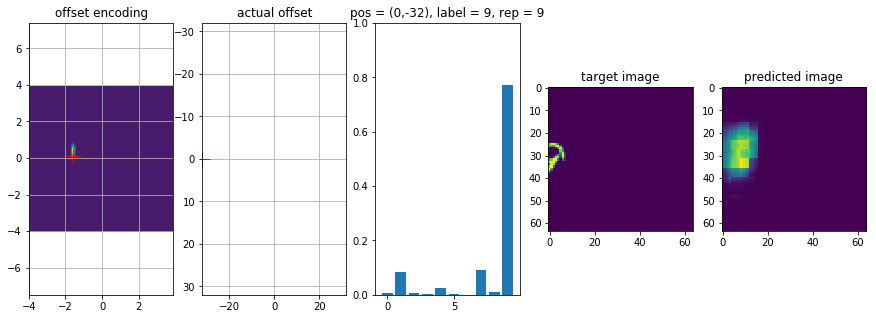

torch.Size([50, 1, 28, 28])
0 -28
[[-1.48383334  0.76577329]] [[-1.48551189  0.45609206]]


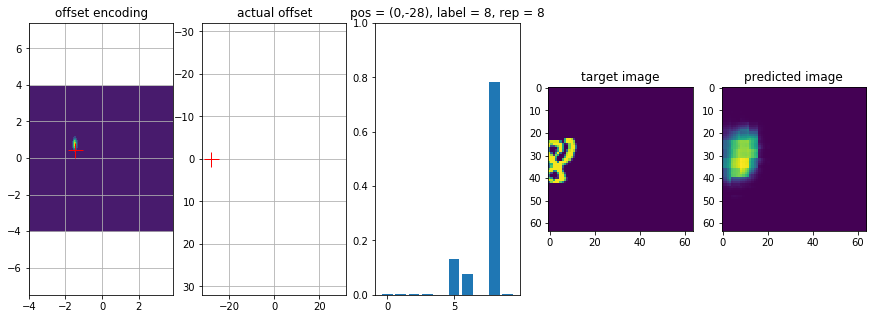

torch.Size([50, 1, 28, 28])
0 -24
[[-1.38739217  0.55303857]] [[-1.38083643  0.53644582]]


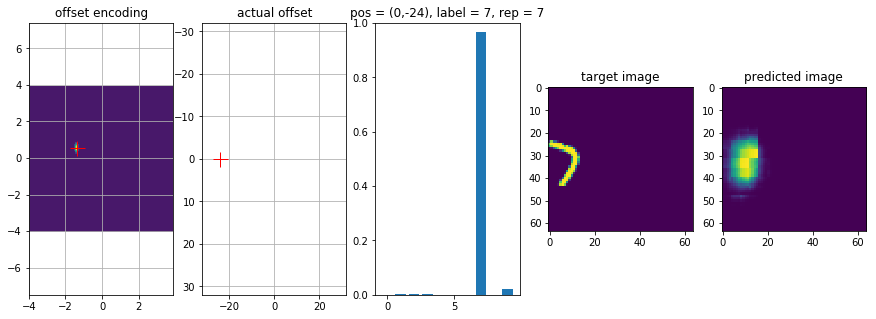

torch.Size([50, 1, 28, 28])
0 -20
[[-1.1637654  0.1000472]] [[-1.1877701  -0.05280115]]


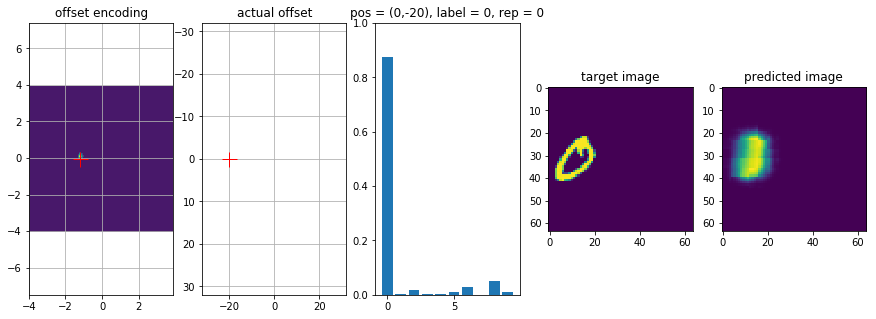

torch.Size([50, 1, 28, 28])
0 -16
[[-0.97094729  0.13729842]] [[-1.00378963  0.21629793]]


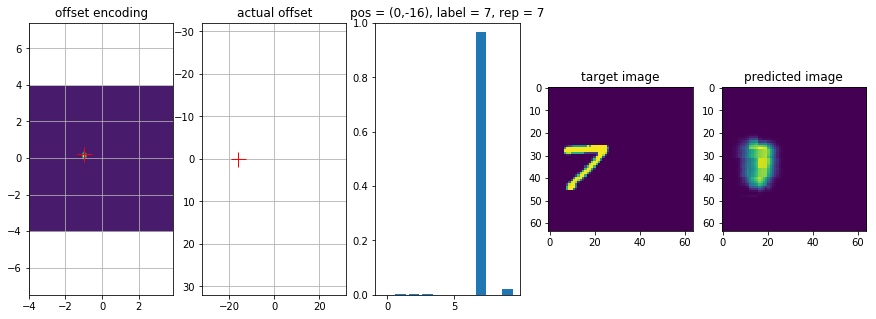

torch.Size([50, 1, 28, 28])
0 -12
[[-0.83428145 -0.21857822]] [[-0.82979436 -0.10417244]]


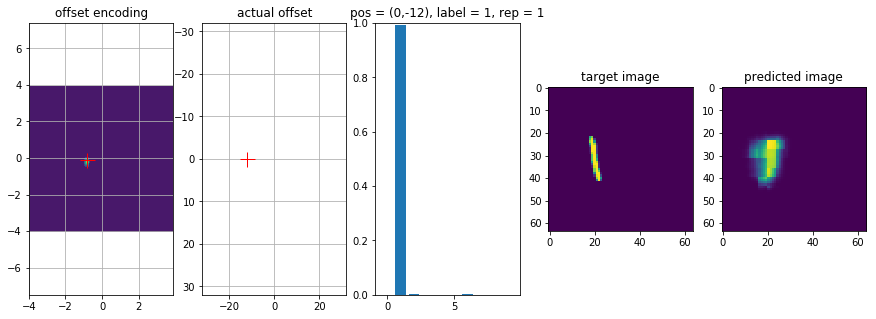

torch.Size([50, 1, 28, 28])
0 -8
[[-0.49853202  0.23421446]] [[-0.45354275  0.2337142 ]]


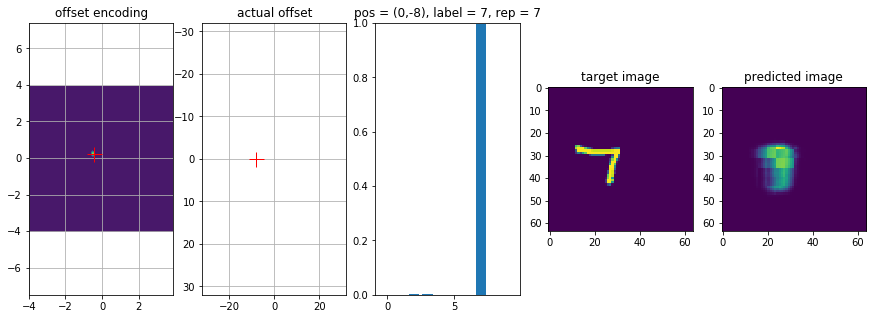

torch.Size([50, 1, 28, 28])
0 -4
[[-0.27456287 -0.0778278 ]] [[-0.26321907 -0.0851025 ]]


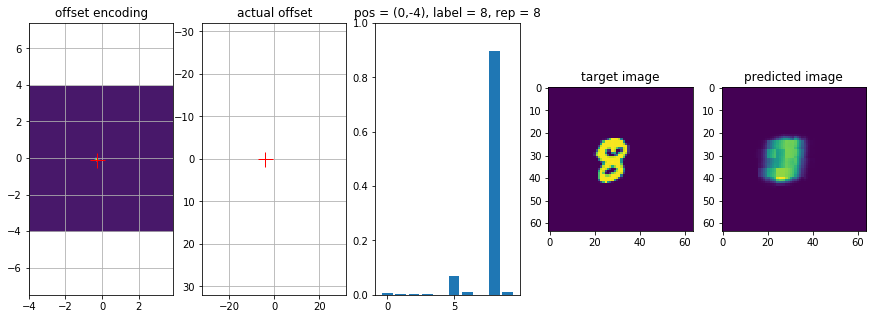

torch.Size([50, 1, 28, 28])
0 0
[[-0.0466442  -0.11773932]] [[-0.06492978 -0.05783718]]


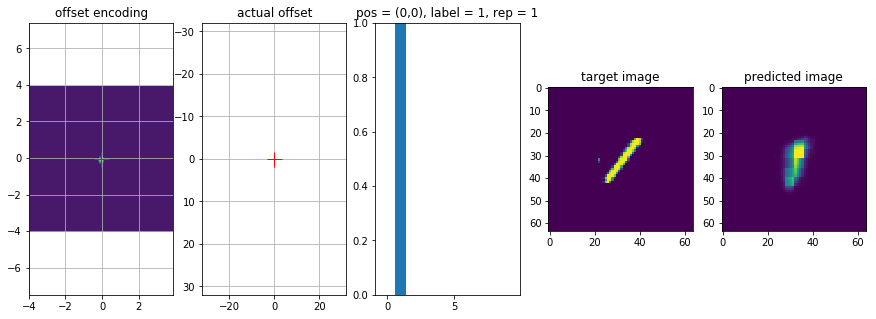

torch.Size([50, 1, 28, 28])
0 4
[[ 0.31638188 -0.06636649]] [[ 0.29564528  0.03587334]]


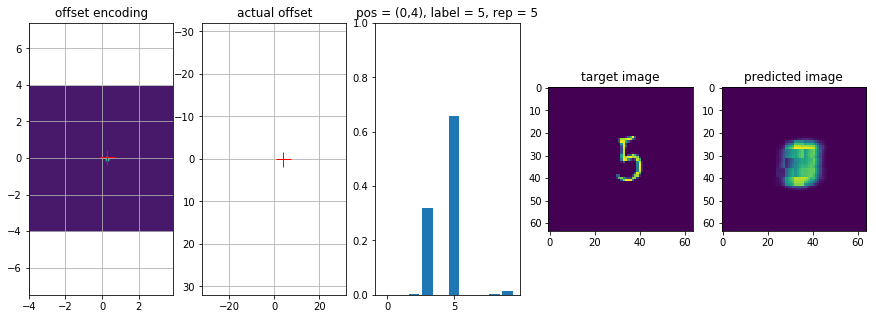

torch.Size([50, 1, 28, 28])
0 8
[[ 0.67907984 -0.05753791]] [[ 0.68672702 -0.05046389]]


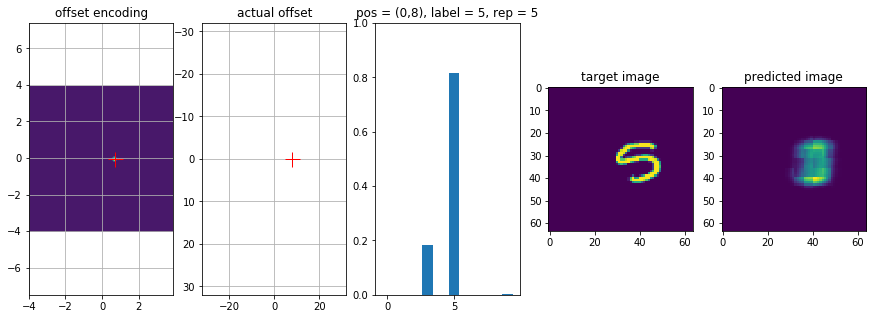

torch.Size([50, 1, 28, 28])
0 12
[[ 0.84950715 -0.22567408]] [[ 0.83545722 -0.30400448]]


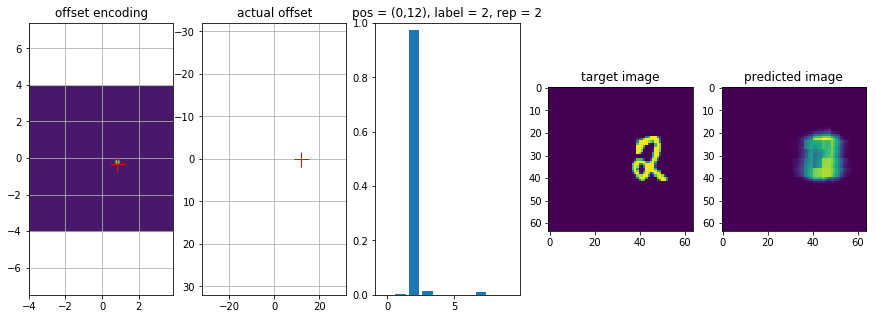

torch.Size([50, 1, 28, 28])
0 16
[[ 1.08102252 -0.39414746]] [[ 1.1271429  -0.34357084]]


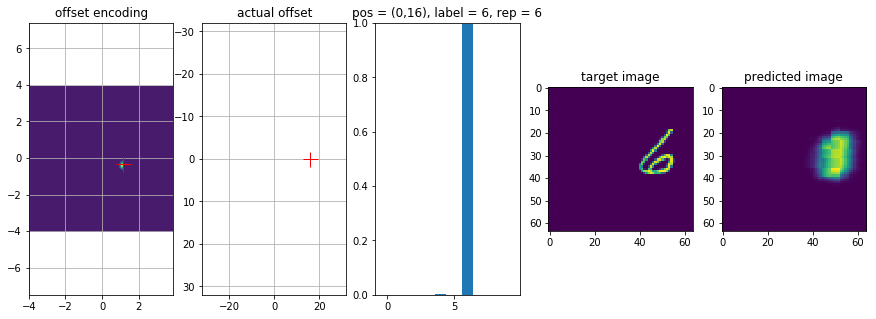

torch.Size([50, 1, 28, 28])
0 20
[[ 1.28766759 -0.07027662]] [[ 1.20901792 -0.08361981]]


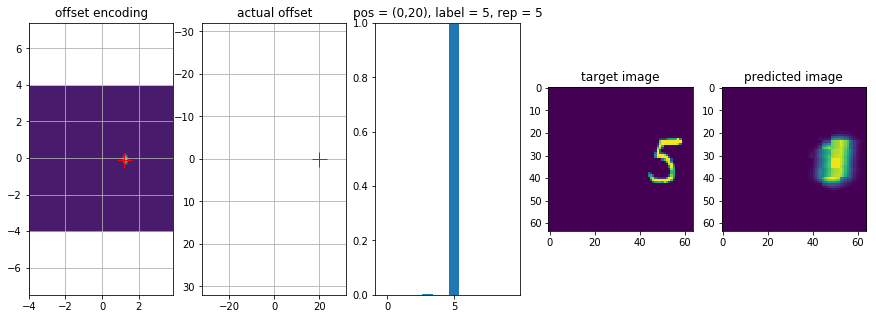

torch.Size([50, 1, 28, 28])
0 24
[[ 1.51351309  0.04214482]] [[ 1.47566763 -0.1758053 ]]


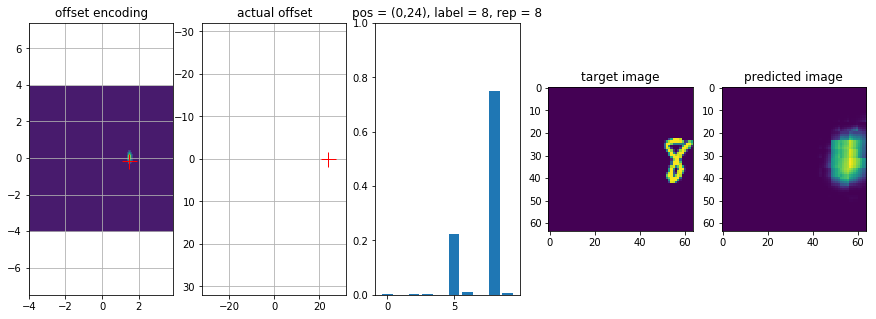

torch.Size([50, 1, 28, 28])
0 28
[[ 1.60233101  0.86487418]] [[ 1.61003643  0.7782279 ]]


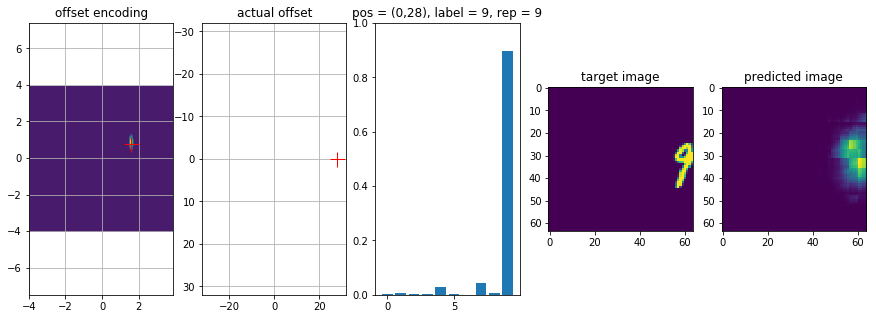

In [17]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_rot import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output[:,1:3].detach().numpy()
    mu_offset = mu_output[:,1:3].detach().numpy()
    logvar_offset = logvar_output[:,1:3].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

tensor(4)
0 -32


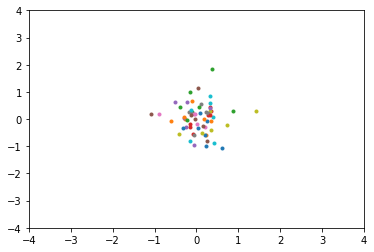

tensor(4)
0 -28


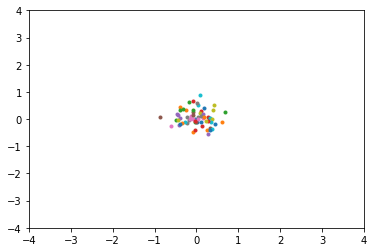

tensor(4)
0 -24


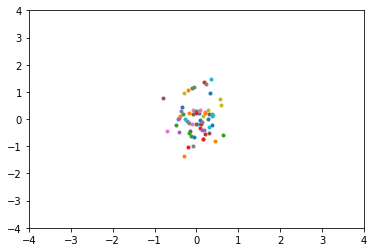

tensor(4)
0 -20


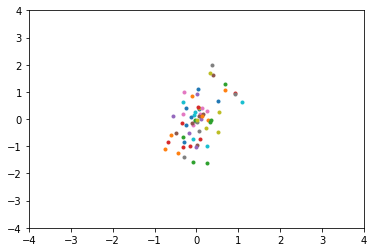

tensor(4)
0 -16


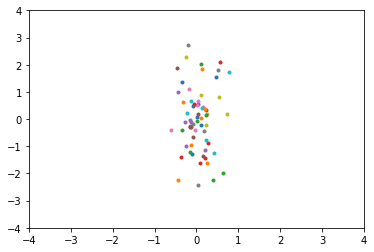

tensor(4)
0 -12


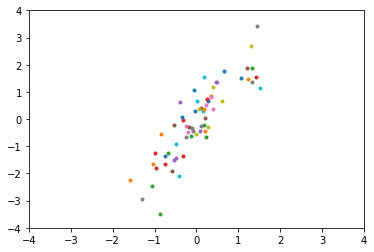

tensor(4)
0 -8


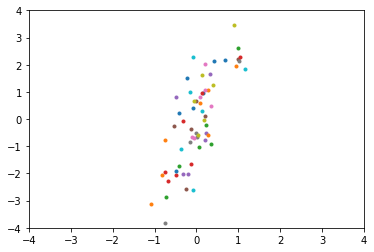

tensor(4)
0 -4


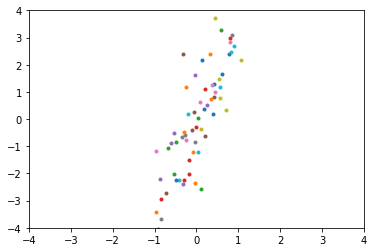

tensor(4)
0 0


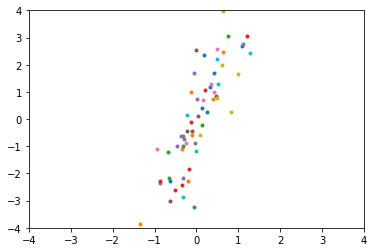

tensor(4)
0 4


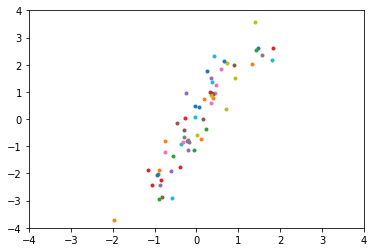

tensor(4)
0 8


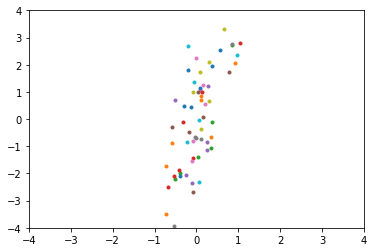

tensor(4)
0 12


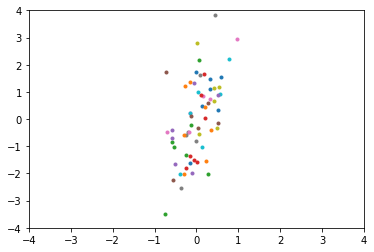

tensor(4)
0 16


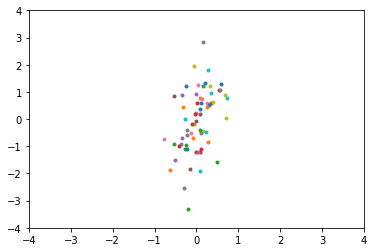

tensor(4)
0 20


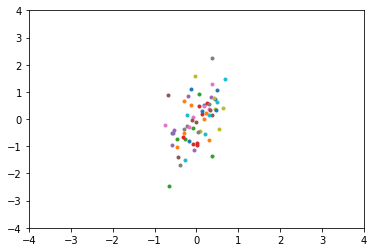

tensor(4)
0 24


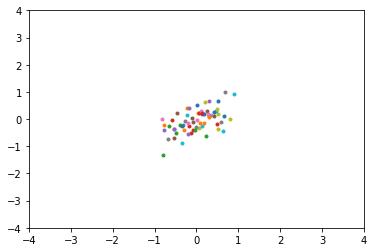

tensor(4)
0 28


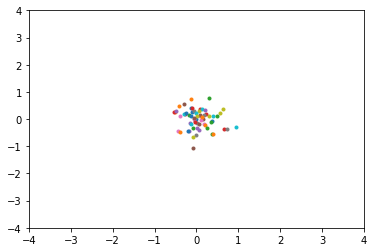

In [19]:
from Where_act_code_VAE_classif_rot import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(-32,32,4):
    #label[idx] = z
    idx = 2
    print(label[idx])
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2, d3 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[4:]
    plt.plot(d2.detach().numpy(),d3.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
un = torch.ones(1,1)
torch.cat((un, un, un), 0)